In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

def log_Y_plotter(X,Y,xlabel,ylabel,label1,a1,a2,b1,b2):
    plt.semilogy(X,Y,label=label1)
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(a1,a2)
    plt.ylim(b1,b2)
    plt.ylabel(ylabel)

def plotter(X,Y,xlabel,ylabel):
    plt.plot(X,Y)
    plt.title(title)
    plt.grid()
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def log_plotter(X,Y,xlabel,ylabel,label1,a1,a2,b1,b2):
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(X,Y)
    plt.grid()
    plt.xlim(a1,a2)
    plt.ylim(b1,b2)
    # plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [2]:

##function that calculates P(M=m) from cumulative probability distribution for guttenberg richter
##by considereing P(M=mi)=P( mi-delta_m/2 <= M < mi+delta_m/2 )

def Gutenberg(b,mmin,mmax,delta_m,N):
 def CumGR(b,mmin,mmax,m,delta_m):
    beta=np.log(10)*b
    m_1=m+delta_m*0.5 
    m_2=m-delta_m*0.5
    
    if m - delta_m*0.5 <= mmin:
        P_m= ( 1- np.exp(-beta*(m_1-mmin)) )/( 1-np.exp(-beta*(mmax-mmin)) )

    else:
     
        P_m= (1-np.exp(-beta*(m_1-mmin)))/(1-np.exp(-beta*(mmax-mmin))) - (1-np.exp(-beta*(m_2-mmin)))/(1-np.exp(-beta*(mmax-mmin)))
              
    return P_m

 #the range of magitudes that we are looking at
 M=np.arange(mmin+delta_m*0.0001,mmax-delta_m*0.00001,delta_m)

 #call function to generate list of P(M=mi) values
 Prob=np.array([CumGR(b,mmin,mmax,m,delta_m) for m in M ])  #this is probability of M=mi
 print(Prob)
 #Considering that M>=mmin 0.05 i.e. an earthquake greater than 5 occurs at least once in 20 years
 lamda=Prob/N #these is the rate of M=mi

#Now calculate rate of exceedance i.e. lambda(M>=mi-delta_m/2)
 sum=np.sum(lamda)

 exceedance_lamda=[]
 for x in range(0,len(lamda)):
      if x==0:
          number =sum
          exceedance_lamda.append(number)
      else:
       number=sum-np.sum(lamda[:x])
       exceedance_lamda.append(number)

 ##preparations for plotting the gutenburg richter
 # exceedance_lamda=np.array(exceedance_lamda)[::-1]
 # M=M[::-1]
 # plt.semilogy(M,exceedance_lamda)
 # plt.xlabel('Magnitude,M')
 # plt.ylabel('Rate of Exceedance , lambda(M>=m)')
 # plt.grid() 
 # plt.show()
 return M,lamda,exceedance_lamda

##INPUTS GIVEN == B-value minimum_earthquake maximum_earthquake stepsize Return_period_for_minimum_earthquake
M,Prob,lamda=Gutenberg(1.0,5.0,8.0,0.01,20)  


'''parametrization to generate curves'''
M1,Prob1,lamda1=Gutenberg(1,5.0,7.7,0.01,20)
M2,Prob2,lamda2=Gutenberg(1,5.0,7.4,0.01,20)

# log_Y_plotter(M,lamda,'Magnitude, (M)',r'Rate of Exceedance , $\lambda$',None,5,8.1,10e-7,0.1)
# log_Y_plotter(M1,lamda1,'Magnitude, (M)',r'Rate of Exceedance, $\lambda$',r'$m_{max}=7.7$',5,8.6,10e-7,0.1)
# log_Y_plotter(M2,lamda2,'Magnitude, (M)',r'Rate of Exceedance, $\lambda$',r'$m_{max}=8.5$',5,8.6,10e-7,0.1)
# plt.legend()
# plt.savefig('parametric_curves_for_content/gutenburg_only.png',dpi=500)

[1.14606422e-02 2.25246885e-02 2.20119640e-02 2.15109106e-02
 2.10212625e-02 2.05427601e-02 2.00751498e-02 1.96181836e-02
 1.91716192e-02 1.87352199e-02 1.83087542e-02 1.78919961e-02
 1.74847245e-02 1.70867236e-02 1.66977823e-02 1.63176944e-02
 1.59462583e-02 1.55832771e-02 1.52285584e-02 1.48819141e-02
 1.45431604e-02 1.42121177e-02 1.38886104e-02 1.35724670e-02
 1.32635199e-02 1.29616054e-02 1.26665632e-02 1.23782370e-02
 1.20964740e-02 1.18211246e-02 1.15520429e-02 1.12890863e-02
 1.10321154e-02 1.07809938e-02 1.05355884e-02 1.02957691e-02
 1.00614088e-02 9.83238317e-03 9.60857080e-03 9.38985303e-03
 9.17611388e-03 8.96724002e-03 8.76312072e-03 8.56364774e-03
 8.36871532e-03 8.17822010e-03 7.99206108e-03 7.81013956e-03
 7.63235908e-03 7.45862538e-03 7.28884634e-03 7.12293194e-03
 6.96079421e-03 6.80234719e-03 6.64750687e-03 6.49619114e-03
 6.34831977e-03 6.20381437e-03 6.06259832e-03 5.92459673e-03
 5.78973644e-03 5.65794595e-03 5.52915538e-03 5.40329644e-03
 5.28030239e-03 5.160108

'parametrization to generate curves'

In [3]:
##FINAL STEP OF CALCULATION
##REQUIRES PGA OF INTEREST AND Rate of earthquakes of Magnitude M=m
def final(SA,lam_rup,i,j):
  
 def EGMM(M,R,V_S30,i):
    #median value of natural log of spectral acceleration for 1s period structures
    ##M-magnitude R-distance_in_km V_S30-shear_wave_velocity_in_soil_in_m/s
    Median_lnSA = -3.4415 + 1.42*M -0.032*M**2 - 0.798*np.log(np.sqrt((R)**2+8.41)) - 0.698*np.log(V_S30)
    #standard deviation
    
    if j==1:
      sigma_lnSA=0.52
    elif j==2:
      sigma_lnSA=0.8*0.52
    else:
       sigma_lnSA=1.5*0.52
    return np.exp(Median_lnSA),sigma_lnSA
 
 def GMMEXC(SA,x,y):
    # P(SA(1s)> PGA | rup) = 1 - \phi(ln(target_PGA)-ln(median_PGA)/standard_Deviation_PGA) 
       return 1 - stats.norm.cdf(np.log(SA),loc=np.log(x),scale=y)
  
 list=[]
 list2=[]
 if i==1:
   for m in M:
        x,y=EGMM(m,10,500,i)
        P = GMMEXC(SA,x,y)
        list.append([P,m])

   for x in range(0,len(M)):
        temp=lam_rup[x]*list[x][0]
        list2.append(temp) 
 elif i==2:
    for m in M1:
        x,y=EGMM(m,10,500)
        P = GMMEXC(SA,x,y)
        list.append([P,m])

    for x in range(0,len(M1)):
        temp=lam_rup[x]*list[x][0]
        list2.append(temp)
 else:
    for m in M2:
        x,y=EGMM(m,10,500)
        P = GMMEXC(SA,x,y)
        list.append([P,m])

    for x in range(0,len(M2)):
        temp=lam_rup[x]*list[x][0]
        list2.append(temp)
 return np.array(list),np.array(list2),sum(list2)  #Returns P(SA(1s)> PGA | rupi) arrays and P(SA(1s)> PGA | rupi)*\lambda(rupi) arrays and total probability of exceedance given rupture and exceedance probs

# print(Prob)
# say for example we want to know exceedance of ground motino for 0.2g PGA
# final(0.2,Prob) 

In [ ]:
def HC_generator(Prob,i,j):
   SA_values=np.arange(0.01,2.01,0.01)
   list=[]
   for SA in SA_values:
      x,y,sum=final(SA,Prob,i,j)
      list.append(sum)
   return np.array(list),np.array(SA_values)

#for diffferent lambda
# Annual_rate,SA=HC_generator(Prob)
# Annual_rate1,SA1=HC_generator(Prob*0.6)
# Annual_rate2,SA2=HC_generator(Prob*1.5)
# log_plotter(SA,Annual_rate,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$\lambda(rup_{i}) $',0.01,1.81,10e-5,0.13)
# log_plotter(SA1,Annual_rate1,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$0.6*\lambda(rup_{i}) $',0.01,1.81,10e-5,0.13)
# log_plotter(SA2,Annual_rate2,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$1.5*\lambda(rup_{i}) $',0.01,1.81,10e-5,0.13)
# plt.savefig('parametric_curves_for_content/hazard_curve_lambda.png',dpi=500)

#for different mmax and mmin
# Annual_rate,SA=HC_generator(Prob,1)
# Annual_rate1,SA1=HC_generator(Prob1,2)
# Annual_rate2,SA2=HC_generator(Prob2,3)
# log_plotter(SA,Annual_rate,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$m_{max}=8.0 $',0.01,1.7,10e-6,0.13)
# log_plotter(SA1,Annual_rate1,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$m_{max}=7.7 $',0.01,1.7,10e-6,0.13)
# log_plotter(SA2,Annual_rate2,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$m_{max}=7.4 $',0.01,1.7,10e-6,0.13)
# # plt.savefig('parametric_curves_for_content/hazard_curve_mmax.png',dpi=500)

#for different sigma values of EGMM
# Annual_rate,SA=HC_generator(Prob,1,1)
# Annual_rate1,SA1=HC_generator(Prob,1,2)
# Annual_rate2,SA2=HC_generator(Prob,1,3)
# log_plotter(SA,Annual_rate,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$\sigma=0.52 $',0.05,2,10e-5,0.13)
# log_plotter(SA1,Annual_rate1,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$\sigma=0.8*0.52 $',0.05,2,10e-5,0.13)
# log_plotter(SA2,Annual_rate2,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$\sigma=1.5*0.52 $',0.05,2,10e-5,0.13)
# plt.savefig('parametric_curves_for_content/hazard_curve_SD.png',dpi=500)
   


200
200
[0.0024904358775617655, 0.006201503342795345, 0.0074336939746215, 0.006804380294545914, 0.005575134680436737, 0.004361557475229354, 0.003355608984895805, 0.0025759427463109743, 0.0019875405830320127, 0.00154702351193104, 0.001216769712391005, 0.0009676229885898762, 0.0007780040356372558, 0.0006322398123441778, 0.0005190112457388982, 0.00043013260500741326, 0.0003596529712498234, 0.000303213856377502, 0.0002575954956159699, 0.00022039741259044596, 0.00018981309254307373, 0.00016447026385981497, 0.00014331693335846983, 0.00012553944559484317, 0.00011050308339810816, 9.770864398168195e-05, 8.676042327465335e-05, 7.734241179856388e-05, 6.920044917349099e-05, 6.212873763592841e-05, 5.5959570053999404e-05, 5.0555447162064083e-05, 4.5802984298954036e-05, 4.160816849615209e-05, 3.789264191110693e-05, 3.459077079692296e-05, 3.164731975118396e-05, 2.9015595375323172e-05, 2.665595624537899e-05, 2.4534610452590054e-05, 2.262264019839438e-05, 2.089520665437075e-05, 1.9330898699668143e-05, 1

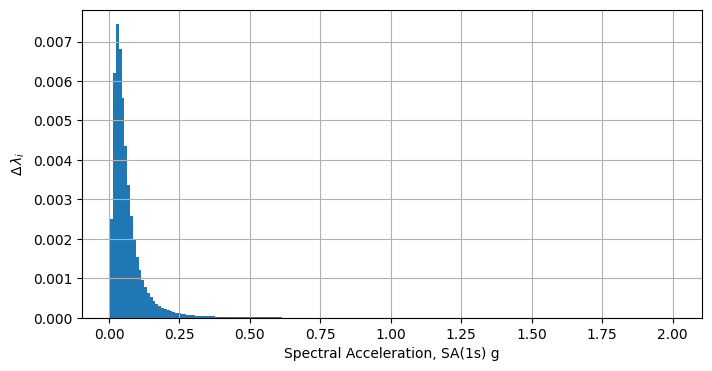

In [24]:
#Hazard Curve derrivative
Annual_rate,SA=HC_generator(Prob,1,1)
# log_plotter(SA,Annual_rate,'Spectral Acceleration, SA(1s) [g]', r'Annual Rate of Exceedance, $\lambda$',r'$\sigma=0.52 $',0.05,2,10e-5,0.13)
derrivatuve_HC=[]
print(len(Annual_rate))
print(len(SA))
for i in range(0,len(Annual_rate)):
  if i==len(Annual_rate)-1:
   derrivatuve_HC.append(0)
   break
  else:
   derriv=Annual_rate[i]-Annual_rate[i+1]
   derrivatuve_HC.append(derriv)
print(derrivatuve_HC)

fig = plt.figure(figsize = (8, 4))
plt.bar(SA,derrivatuve_HC,width=0.01)
plt.xlabel('Spectral Acceleration, SA(1s) g')
plt.ylabel(r'$\Delta\, \lambda_{i} $')
plt.grid()
plt.savefig('parametric_curves_for_content/hazard_curve_derrivative.png',dpi=500)